In [18]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# Deep Neural Network

## Template 03
## FIFA dataset 

<img src='../../../images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com"/>

In [38]:
###-----------------
### Import libraries
###-----------------
from pathlib import Path  # Import Path for file system path operations and management
import numpy as np  # Import NumPy for numerical computations and array operations
import pandas as pd  # Import Pandas for data manipulation and analysis with DataFrames
import matplotlib.pyplot as plt  # Import Matplotlib for creating static, interactive visualizations
import seaborn as sns  # Import Seaborn for statistical data visualization built on Matplotlib

from sklearn.model_selection import train_test_split  # Import function to split dataset into training and testing subsets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score  # Import function to calculate various metric

from collections.abc import Callable  # Type hinting callable objects/functions
from typing import Literal  # Literal type hints to restrict variable values

from sklearn.preprocessing import StandardScaler  # Import for standardizing features (zero mean, unit variance)
import tensorflow as tf
#from Assignment1_MPNeuron.A01_MP_Neuron_model_v0_Ishaan17 import X_test

#from utils.helper import fn_plot_torch_hist, fn_plot_confusion_matrix # Custom utility

In [20]:
def fn_plot_confusion_matrix(y_true, y_pred, labels):
    '''
    Args:
        y_true: Ground Truth
        y_pred : Predictions
        labels : labels in a dictonary
                  {0: 'Goal Keeper',
                  1: 'Defender',
                  2: 'Mid-Fielder',
                  3: 'Forward'}

    '''

    cm  = confusion_matrix(y_true, y_pred)

    if isinstance(labels, dict):
        display_labels = labels.values()
    else:
        display_labels = labels

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=display_labels)

    fig, ax = plt.subplots(figsize = (4,4))

    disp.plot(ax = ax, cmap = 'Blues', xticks_rotation = 'vertical', colorbar=False)

    # Disable the grid
    ax.grid(False)

    plt.show()


In [21]:
def fn_plot_tf_hist(hist_df):

    '''
    Args:
        hist_df: a dataframe with following ccolumns
            column 0: accuracy
            column 1: loss
            column 2: val_accuracy
            column 3: val_loss
            While plotting columns are accessed by index
            so that even if the column names are different it will not throw exceptions.
    '''

    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch
    props = dict(boxstyle='round', facecolor='aqua', alpha=0.4)
    facecolor = 'cyan'
    fontsize=12
    CMAP = plt.cm.coolwarm

    # Get columns by index to eliminate any column naming error
    y1 = hist_df.columns[0]
    y2 = hist_df.columns[1]
    y3 = hist_df.columns[2]
    y4 = hist_df.columns[3]

    # Where was min loss
    best = hist_df[hist_df[y4] == hist_df[y4].min()]

    ax = axes[0]

    hist_df.plot(y = [y2,y4], ax = ax, colormap=CMAP)


    # little beautification
    txtFmt = '{:s}: \n  train: {:6.4f}\n   test: {:6.4f}'
    txtstr = txtFmt.format(y2.capitalize(),
                           hist_df.iloc[-1][y2],
                           hist_df.iloc[-1][y4]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # calculate offset for arroe
    y_min = min(hist_df[y2].min(), hist_df[y4].min())
    y_max = max(hist_df[y2].max(), hist_df[y4].max())
    offset = (y_max-y_min)/10.0

    # Mark arrow at lowest
    ax.annotate(f'Min: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y4].to_numpy()[0] + offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3)

    ax.set_xlabel('Epochs')
    ax.set_ylabel(y2.capitalize())
    ax.set_title('Errors')
    ax.grid(True)
    ax.legend(loc = 'upper left') # model legend to upper left

    ax = axes[1]

    hist_df.plot( y = [y1, y3], ax = ax, colormap=CMAP)

    # little beautification
    txtFmt = '{:s}: \n  train: {:6.4f}\n  test:  {:6.4f}'
    txtstr = txtFmt.format(y1.capitalize(),
                           hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y3]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # calculate offset for arroe
    y_min = min(hist_df[y1].min(), hist_df[y3].min())
    y_max = max(hist_df[y1].max(), hist_df[y3].max())
    offset = (y_max-y_min)/10.0

    # Mark arrow at lowest
    ax.annotate(f'Best: {best[y3].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y3].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y3].to_numpy()[0]-offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow


    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3)

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y1.capitalize())
    ax.grid(True)
    ax.legend(loc = 'lower left')

    plt.tight_layout()




In [22]:
print (fn_plot_tf_hist.__doc__)


Args:
    hist_df: a dataframe with following ccolumns
        column 0: accuracy
        column 1: loss
        column 2: val_accuracy
        column 3: val_loss
        While plotting columns are accessed by index 
        so that even if the column names are different it will not throw exceptions.



In [23]:
print (fn_plot_confusion_matrix.__doc__)


Args:
    y_true: Ground Truth 
    y_pred : Predictions
    labels : labels in a dictonary 
              {0: 'Goal Keeper', 
              1: 'Defender', 
              2: 'Mid-Fielder', 
              3: 'Forward'}




In [24]:
###----------------------
### Some basic parameters
###----------------------

inpDir = Path('..') / '..' / 'input'
outDir = Path('..') / 'output'
modelDir = Path('..') / 'models'
subDir = 'fifa_2019'

RANDOM_STATE = 24 # for initialization ----- REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

EPOCHS = 101 # number of epochs
BATCH_SIZE = 64
ALPHA = 0.001 # learning rate
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

## Basic Hygiene

In [25]:
# Check if all directories are present
outDir.mkdir(parents=True, exist_ok=True)

modelSubDir = modelDir/ subDir
modelSubDir.mkdir(parents=True, exist_ok=True)

## Read FIFA 2019 data set

In [26]:
data_df = pd.read_csv( 'fifa_2019.csv')
data_df.shape

(18207, 89)

In [27]:
# removing rows with position = null
data_df = data_df[data_df["Position"].notnull()]
data_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [28]:
# Following columns appear to be relevant for our analysis
rel_cols = ["Position", 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
            'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
            'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
            'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
            'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
            'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
            'GKKicking', 'GKPositioning', 'GKReflexes']

In [29]:
goalkeeper = 'GK'
forward = ['ST', 'LW', 'RW', 'LF', 'RF', 'RS','LS', 'CF']
midfielder = ['CM','RCM','LCM', 'CDM','RDM','LDM', 'CAM', 'LAM', 'RAM', 'RM', 'LM']
defender = ['CB', 'RCB', 'LCB', 'LWB', 'RWB', 'LB', 'RB']

In [30]:
#Assign labels to goalkeepers
data_df.loc[data_df["Position"] == "GK", "Position"] = 0

#Defenders
data_df.loc[data_df["Position"].isin(defender), "Position"] = 1

#Midfielders
data_df.loc[data_df["Position"].isin(midfielder), "Position"] = 2

#Forward
data_df.loc[data_df["Position"].isin(forward), "Position"] = 3

# Convert Column "Position" to numeric so that Pandas does not complain
data_df['Position'] = pd.to_numeric(data_df['Position'], downcast="integer")

In [31]:
data_df = data_df[rel_cols]
data_df.head()

,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,3,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,3,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,3,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,2,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [32]:
labels = {0: 'Goal Keeper', 1: 'Defender', 2: 'Mid-Fielder', 3: 'Forward'}

In [33]:
# splitting in train ans test datasets
train_df, test_df = train_test_split(data_df,
                                     stratify=data_df['Position'],
                                     test_size=TEST_SIZE, 
                                     random_state=RANDOM_STATE )
train_df.shape, test_df.shape

((14517, 34), (3630, 34))

In [34]:
# important to reset the indies as we will be fetching by index

train_df = train_df.reset_index(drop=True)
display (train_df.head())

test_df = test_df.reset_index(drop=True)
display(test_df.head())

,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,3,62.0,57.0,51.0,47.0,61.0,42.0,27.0,41.0,59.0,...,63.0,52.0,21.0,16.0,12.0,11.0,7.0,10.0,12.0,11.0
1,3,55.0,42.0,58.0,60.0,62.0,61.0,56.0,52.0,60.0,...,60.0,53.0,29.0,25.0,22.0,7.0,12.0,6.0,9.0,10.0
2,2,56.0,36.0,61.0,51.0,69.0,60.0,52.0,57.0,66.0,...,54.0,50.0,23.0,22.0,27.0,12.0,10.0,9.0,9.0,14.0
3,0,11.0,12.0,35.0,12.0,12.0,22.0,13.0,40.0,20.0,...,20.0,60.0,11.0,10.0,15.0,69.0,70.0,66.0,67.0,73.0
4,2,66.0,44.0,66.0,48.0,70.0,74.0,75.0,62.0,67.0,...,76.0,60.0,40.0,38.0,28.0,14.0,12.0,6.0,12.0,12.0


,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,2,66.0,33.0,72.0,55.0,81.0,69.0,65.0,61.0,79.0,...,57.0,68.0,23.0,26.0,30.0,12.0,14.0,16.0,6.0,10.0
1,2,71.0,43.0,68.0,43.0,72.0,74.0,69.0,70.0,78.0,...,64.0,66.0,39.0,26.0,16.0,14.0,14.0,13.0,6.0,8.0
2,2,67.0,43.0,61.0,49.0,65.0,48.0,35.0,44.0,65.0,...,54.0,47.0,49.0,13.0,19.0,9.0,12.0,15.0,12.0,13.0
3,2,55.0,37.0,69.0,45.0,67.0,50.0,51.0,64.0,62.0,...,53.0,61.0,55.0,61.0,57.0,13.0,7.0,10.0,8.0,12.0
4,1,25.0,82.0,61.0,20.0,51.0,25.0,33.0,63.0,60.0,...,42.0,67.0,77.0,78.0,70.0,15.0,12.0,13.0,14.0,15.0


In [35]:
list(labels.keys())

[0, 1, 2, 3]

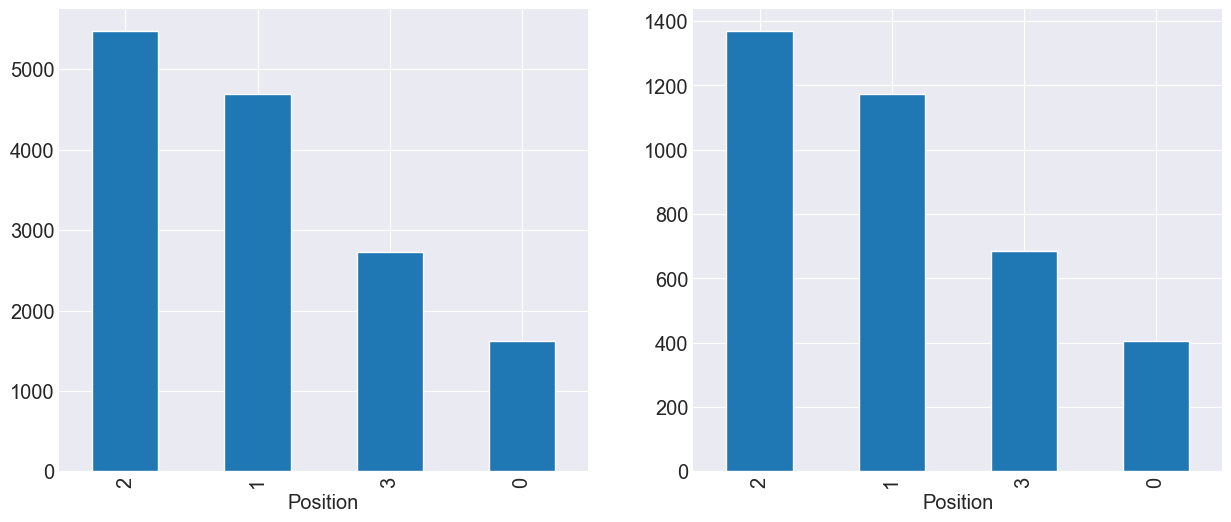

In [36]:
fig, axes = plt.subplots(1,2)
ax = axes[0]
train_df['Position'].value_counts().plot(kind = "bar", ax = ax);

ax = axes[1]
test_df['Position'].value_counts().plot(kind = "bar", ax = ax);

In [40]:
class_labels={0:'Goal Keeper', 1:'Defender', 2:'Mid-Fielder', 3:'Forward'}
labels=data_df['Position']
features_df=data_df.drop('Position',axis=1)
features_df.shape,labels.shape

((18147, 33), (18147,))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels,
                                     stratify=data_df['Position'],
                                     test_size=TEST_SIZE,
                                     random_state=RANDOM_STATE )
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((14517, 33), (3630, 33), (14517,), (3630,))

In [42]:
ss=StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [43]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [44]:
type(X_train), type(X_test), type(y_train), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

CONVERTING TO DATASETS

Giving numpy matrix and making combination row by row

In [47]:
train_ds=tf.data.Dataset.from_tensor_slices((X_train,y_train))
test_ds=tf.data.Dataset.from_tensor_slices((X_test,y_test))

take whole set and shuffle

In [48]:
train_ds=train_ds.shuffle(buffer_size=X_train.shape[0]).batch(BATCH_SIZE)
test_ds=test_ds.shuffle(buffer_size=X_test.shape[0]).batch(BATCH_SIZE)

cache it and prefit in whatever space we have(Autotune)

In [49]:
train_ds=train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [51]:
next(iter(train_ds))

(<tf.Tensor: shape=(32, 33), dtype=float64, numpy=
 array([[ 1.10002956,  0.73376451,  0.70103229, ..., -0.31676557,
         -0.55183016, -0.20690075],
        [ 1.5097334 ,  0.15854341,  0.83696878, ..., -0.4382082 ,
         -0.08081785, -0.54141217],
        [-2.22881417, -2.71756211, -2.62941184, ...,  2.59785748,
          2.98076211,  2.74795021],
        ...,
        [ 1.45852042,  0.90633084,  1.720556  , ..., -0.19532294,
         -0.43407708, -0.54141217],
        [-1.30698052, -1.27950935, -2.08566586, ...,  2.84074273,
          2.45087327,  2.41343878],
        [ 1.71458533,  0.96385295,  0.36119105, ..., -0.62037214,
         -0.02194131, -0.03964503]], shape=(32, 33))>,
 <tf.Tensor: shape=(32,), dtype=int8, numpy=
 array([3, 2, 0, 1, 2, 1, 3, 0, 2, 2, 2, 1, 2, 3, 1, 1, 2, 3, 3, 3, 2, 0,
        1, 2, 1, 1, 3, 2, 1, 2, 0, 3], dtype=int8)>)

In [ ]:
for features,labels in train_ds.take(1):
    print(features.shape, labels.shape)

DEFINE MODEL

In [53]:
model=tf.keras.Sequential([
    tf.keras.Input(shape=(33,)),
    tf.keras.layers.Dense(23, activation='relu'),
    tf.keras.layers.Dense(13, activation='relu'),
    tf.keras.layers.Dense(4)
])

In [54]:
loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer=tf.keras.optimizers.Adam(learning_rate=ALPHA)
model.compile(optimizer=optimizer,loss=loss_fn,metrics=['accuracy'])

In [55]:
history=model.fit(train_ds,epochs=EPOCHS,validation_data=test_ds)

Epoch 1/101
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8005 - loss: 0.5091 - val_accuracy: 0.8526 - val_loss: 0.3404
Epoch 2/101
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8679 - loss: 0.3181 - val_accuracy: 0.8631 - val_loss: 0.3188
Epoch 3/101
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8749 - loss: 0.3036 - val_accuracy: 0.8689 - val_loss: 0.3120
Epoch 4/101
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8787 - loss: 0.2964 - val_accuracy: 0.8689 - val_loss: 0.3076
Epoch 5/101
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8802 - loss: 0.2918 - val_accuracy: 0.8697 - val_loss: 0.3052
Epoch 6/101
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8817 - loss: 0.2885 - val_accuracy: 0.8689 - val_loss: 0.3036
Epoch 7/101
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8828 - loss: 0.2859 - val_accuracy: 0.8708 - val_loss: 0.3024
Epoch 8/101
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8835 - loss: 0.2837 - val_accu

<Axes: >

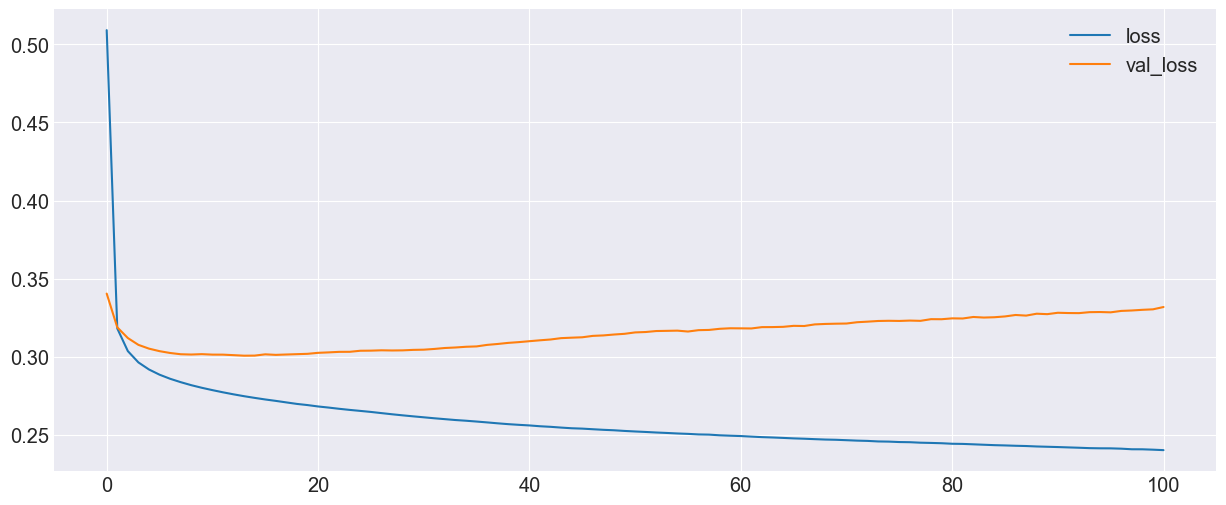

In [57]:
loss_df=pd.DataFrame(history.history)
loss_df.plot(y=['loss','val_loss'])

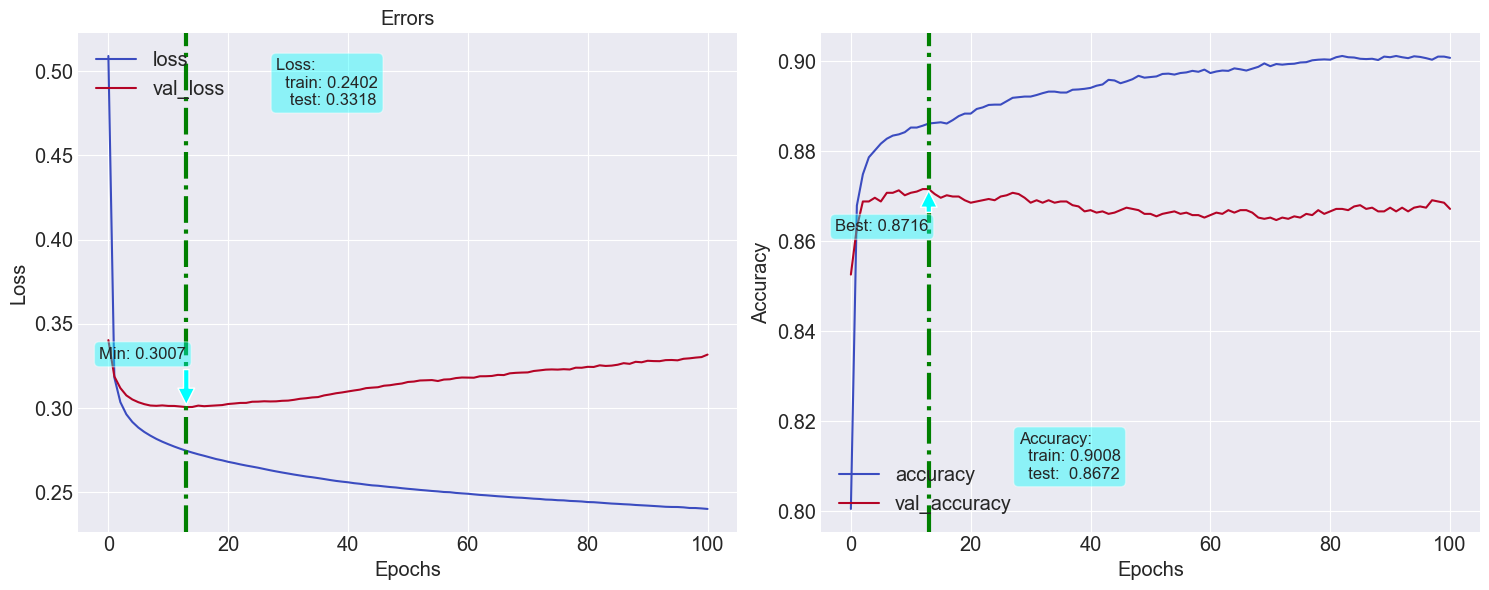

In [60]:
loss_df=pd.DataFrame(history.history)
fn_plot_tf_hist(loss_df)

In [56]:
model.evaluate(train_ds,verbose=2)
model.evaluate(test_ds,verbose=2)

454/454 - 1s - 3ms/step - accuracy: 0.8982 - loss: 0.2455
114/114 - 0s - 2ms/step - accuracy: 0.8672 - loss: 0.3318


[0.3318086862564087, 0.8672176599502563]

PREDICTIONS

On train data

In [58]:
y_true,y_pred=[],[]
for feat,lbls in train_ds:
    pred=model(feat).numpy()
    y_true.extend(lbls)
    y_pred.extend(pred.argmax(axis=1))
print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
print(classification_report(y_true, y_pred))

Accuracy: 0.8981883309223668
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1620
           1       0.91      0.96      0.93      4693
           2       0.86      0.87      0.87      5470
           3       0.89      0.79      0.83      2734

    accuracy                           0.90     14517
   macro avg       0.92      0.90      0.91     14517
weighted avg       0.90      0.90      0.90     14517



In [65]:
print(confusion_matrix(y_train,y_pred))

[[ 185  560  613  262]
 [ 547 1634 1779  733]
 [ 588 1802 2120  960]
 [ 300  962 1015  457]]


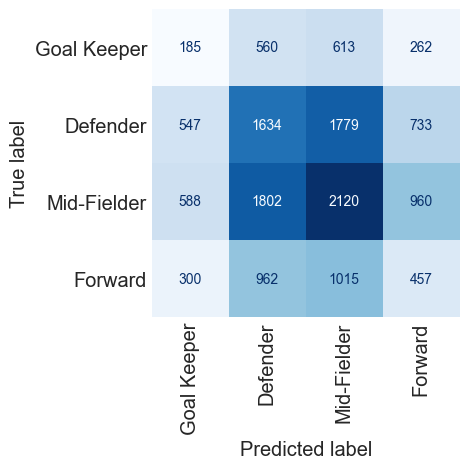

In [66]:
fn_plot_confusion_matrix(y_train,y_pred,labels=class_labels)

On Test Data

In [67]:
y_true,y_pred=[],[]
for feat,lbls in test_ds:
    pred=model(feat).numpy()
    y_true.extend(lbls)
    y_pred.extend(pred.argmax(axis=1))
print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
print(classification_report(y_true, y_pred))

Accuracy: 0.8672176308539945
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       0.89      0.94      0.91      1173
           2       0.82      0.83      0.83      1368
           3       0.84      0.74      0.78       684

    accuracy                           0.87      3630
   macro avg       0.89      0.88      0.88      3630
weighted avg       0.87      0.87      0.87      3630



In [69]:
print(confusion_matrix(y_test,y_pred))

[[ 46 123 168  68]
 [115 406 445 207]
 [164 489 504 211]
 [ 80 221 267 116]]


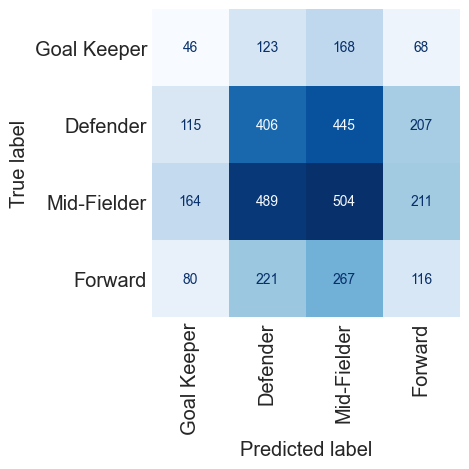

In [70]:
fn_plot_confusion_matrix(y_test,y_pred,labels=class_labels)